# Heun

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
h = 1
g = 9.81 
C = 0.55 
diameter = 0.03 
r = diameter/2 
A = np.pi*(r**2) 

H = np.zeros(10000)
H[0] = 2.75
t = np.zeros(10000)
t[0] = 1
Hbar = np.zeros(10000)

Hasil dengan menggunakan Metode Heun : 
Waktu untuk menghabiskan air adalah 7488.0 detik


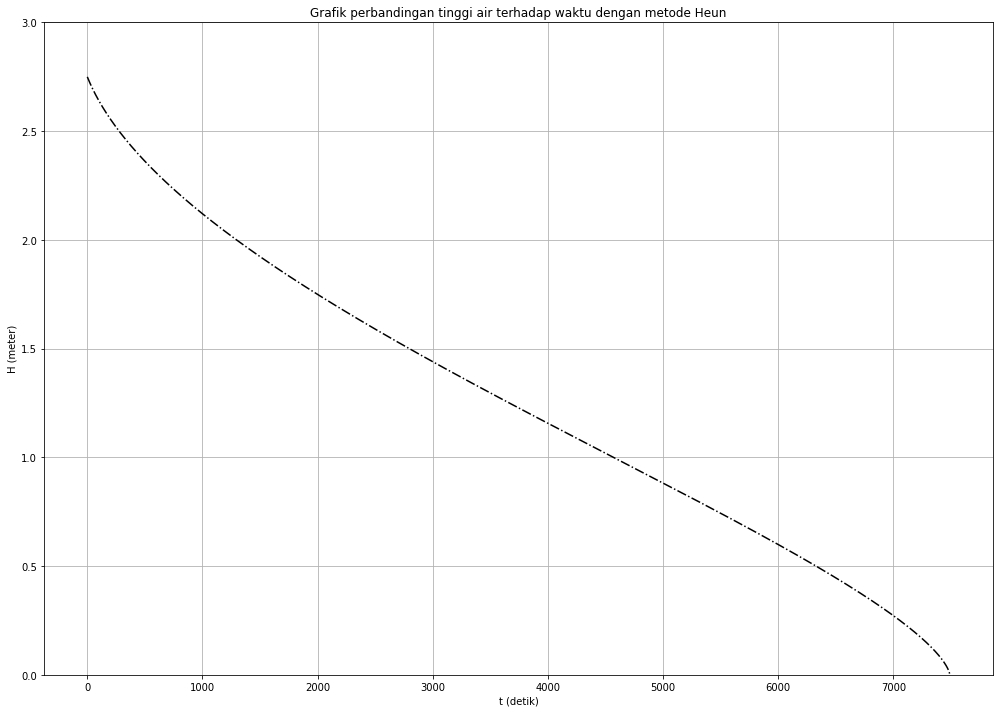

In [7]:
def f(t,H):
    return -0.000548144*(H**(1/2)/(3*H - H**2))

for i in range(1,10000):
  pertama = h * f(t,H[i-1])
  Hbar[i] = H[i-1] + pertama
  H[i] = H[i-1] + np.dot(h/2, f(t,H[i-1]) + f(t,Hbar[i]))
  if H[i] <= 0:
    for a in range(i,10000):
        t[a]=i
    break
  t[i] = t[i-1] + h
  
print("Hasil dengan menggunakan Metode Heun : ")
print('Waktu untuk menghabiskan air adalah', max(t), 'detik')

plt.figure(figsize=(17, 12))
plt.plot(t, H, linestyle ="dashdot", color="black")
plt.xlabel("t (detik)")
plt.ylabel("H (meter)")
plt.title('Grafik perbandingan tinggi air terhadap waktu dengan metode Heun')
plt.ylim([0,3])
plt.grid(True)
plt.show()

# Midpoint

Hasil dengan menggunakan Metode Midpoint : 
waktu untuk menghabiskan air adalah 7488.0 detik


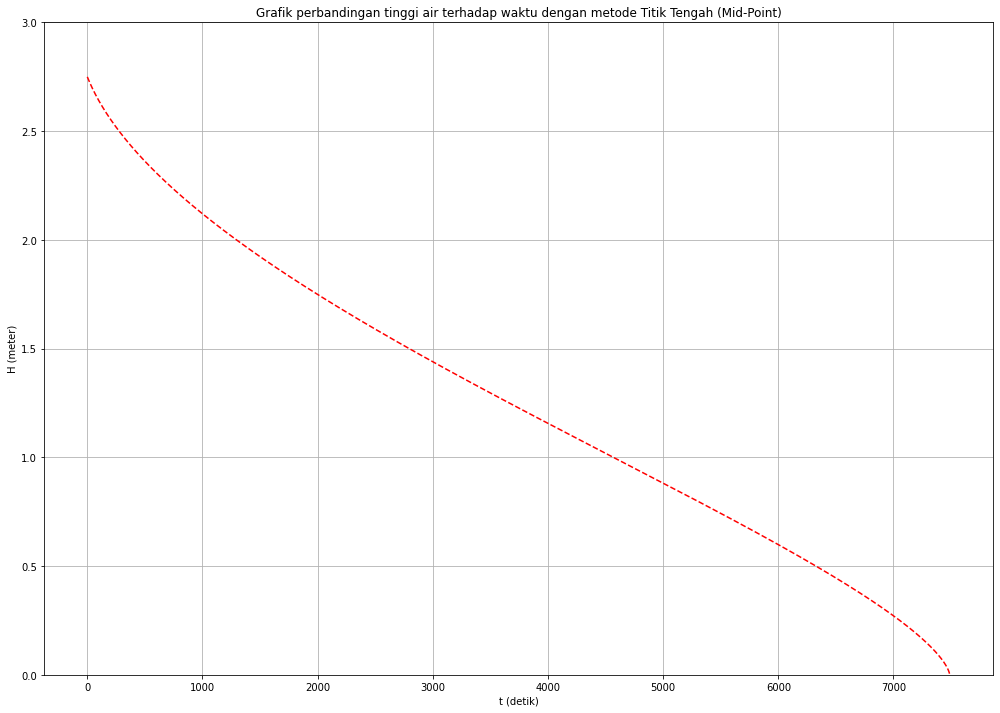

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(H2,t2):
    return -0.000548144*(math.sqrt(H2)/(3*H2 - H2**2))

H2 = np.zeros(10000)
H2[0] = 2.75
t2 = np.zeros(10000)
t2[0] = 0
Hbar2 = np.zeros(10000)

h = 1
g = 9.81 #gravitasi #GADIPAKE
C = 0.55 #GADIPAKE
diameter = 0.03 #orifice #meter #GADIPAKE
r = diameter/2 #meter
A = np.pi*(r**2) #GADIPAKE

for i in range(1,10000):
    Hbar2[i] = H2[i-1] + h/2*f(H2[i-1], (i-1)*h)
    H2[i] = H2[i-1] + h*(f(Hbar2[i],(i-1/2)*h))
    if H2[i] <= 0:
        for a in range (i,10000):
             t2[a]=i
        break
    t2[i] = t2[i-1] + h
print("Hasil dengan menggunakan Metode Midpoint : ")
print('waktu untuk menghabiskan air adalah', max(t2), 'detik')
#Data = [[H2[i],Hbar2[i],t[i]] for i in range (10)]
#print(Data)
plt.figure(figsize=(17, 12))
plt.plot(t2,H2,linestyle ="--", color="red")
plt.xlabel("t (detik)")
plt.ylabel("H (meter)")
plt.title('Grafik perbandingan tinggi air terhadap waktu dengan metode Titik Tengah (Mid-Point)')
plt.ylim([0,3])
plt.grid(True)
plt.show()

# Runge-Kutta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


 
Hasil dengan menggunakan Metode Runge Kutta Orde 4 : 
Waktu yang diperlukan untuk air keluar habis dari tangki adalah t = 7488.0000 detik 


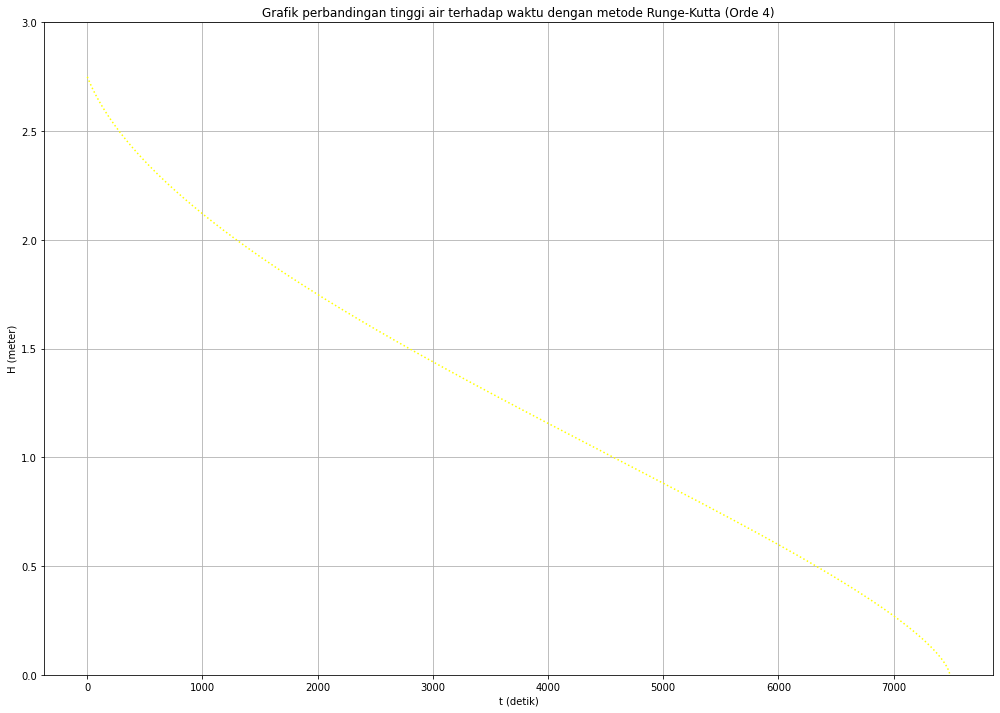

In [9]:
import numpy as np
import matplotlib.pyplot as plt

dHdt = lambda t,H : -0.00054814*(np.sqrt(H)/(3*H-H**2)) 
h = 1

def rungekt(f,h) : 
  t = [0] 
  H = [2.75] 
  k1 = []
  k2 = []
  k3 = []
  k4 = []

  i = 0  # iterasi 
  while H[i] > 0 : 
    if H[i] > 0 : 
      k1_new = dHdt(t[i],H[i]) ; k1.append(k1_new)
      k2_new = dHdt(t[i] + h/2 , H[i] + k1_new*h/2) ; k2.append(k2_new)
      k3_new = dHdt(t[i] + h/2 , H[i] + k2_new*h/2) ; k3.append(k3_new)
      k4_new = dHdt(t[i] + h , H[i] + k3_new*h) ; k4.append(k4_new)

      H_new = H[i] + 1/6*(k1_new + 2*k2_new + 2*k3_new + k4_new)*h 
      H.append(H_new)

      t_new = t[i] + h ; t.append(t_new)
      i += 1 
    else: 
      break
  return t,H,i,k1,k2,k3,k4

tdata, Hdata, hasili, k1a,k2a,k3a,k4a= rungekt(dHdt, h)
print(" ")
print("Hasil dengan menggunakan Metode Runge Kutta Orde 4 : ")
print("Waktu yang diperlukan untuk air keluar habis dari tangki adalah t = %.4f detik "  %rungekt(dHdt,h)[0][hasili])
plt.figure(figsize=(17, 12))
plt.plot(tdata,Hdata, label ="Metode Runge-Kutta", linestyle =":", color="yellow")
plt.xlabel("t (detik)")
plt.ylabel("H (meter)")
plt.title("Grafik perbandingan tinggi air terhadap waktu dengan metode Runge-Kutta (Orde 4)")
plt.ylim([0,3])
plt.grid(True)
plt.show()

# Gambar Gabungan

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [11]:
x_Heun = t
y_Heun = H

x_Mid = t2
y_Mid = H2

x_RK = tdata
y_RK = Hdata

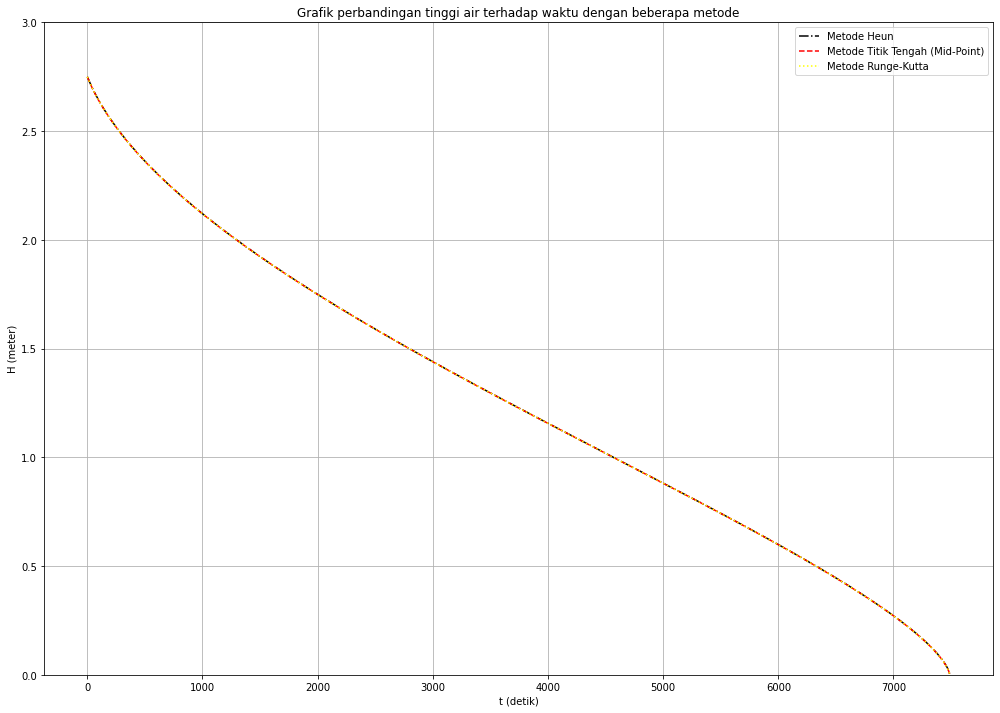

In [14]:
# Menghasilkan grafik
plt.figure(figsize=(17, 12))
plt.plot(x_Heun, y_Heun, label ="Metode Heun", linestyle ="dashdot", color="black")
plt.plot(x_Mid,y_Mid, label ="Metode Titik Tengah (Mid-Point)", linestyle ="--", color="red")
plt.plot(x_RK,y_RK, label ="Metode Runge-Kutta", linestyle =":", color="yellow")
plt.xlabel("t (detik)")
plt.ylabel("H (meter)")
plt.title('Grafik perbandingan tinggi air terhadap waktu dengan beberapa metode')
plt.ylim([0,3])
plt.grid(True)
plt.legend()
plt.show()